In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import nn



INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


#### Let's load in the original training set

In [2]:
data = np.load('tight_bent.npz')
INPUT = data['INPUT']
OUTPUT = data['OUTPUT']

#### Let's find the real and imaginary parts from the training sets for as simple case:

In [3]:
# Find first index
index1 = np.argmin(np.sum(np.abs(INPUT - [1.5,0.5,0.2,12]) ** 2,axis=1))
# Find last index
index2 = np.argmin(np.sum(np.abs(INPUT - [1.6,0.5,0.2,12]) ** 2,axis=1))

# Build INPUT and OUTPUT subset
INPUT_sub  = INPUT[index1:index2,:]
OUTPUT_sub = OUTPUT[index1:index2,:]

#add on angle
INPUT_sub = np.hstack( (INPUT_sub, np.ones((INPUT_sub.shape[0],1))*90) )

#### Now we will evaluate the same input through the ANN

In [4]:
OUTPUT_ANN = nn.ANN_bent.output(INPUT_sub)

#### Finally we plot and compare the results

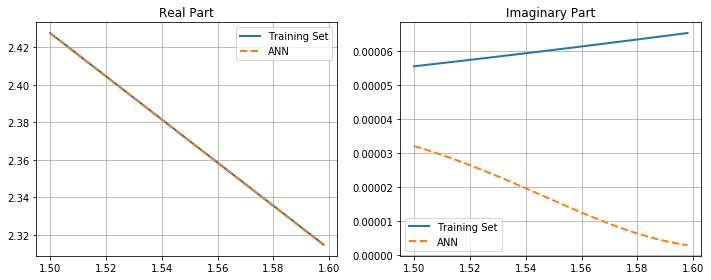

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title('Real Part')
plt.plot(INPUT_sub[:,0],np.real(OUTPUT_sub),linewidth=2,label='Training Set')
plt.plot(INPUT_sub[:,0],OUTPUT_ANN[:,0],'--',linewidth=2,label='ANN')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Imaginary Part')
plt.plot(INPUT_sub[:,0],np.imag(OUTPUT_sub),linewidth=2,label='Training Set')
plt.plot(INPUT_sub[:,0],OUTPUT_ANN[:,1],'--',linewidth=2,label='ANN')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Everything looks much better!